In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')  # Load Titanic dataset

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


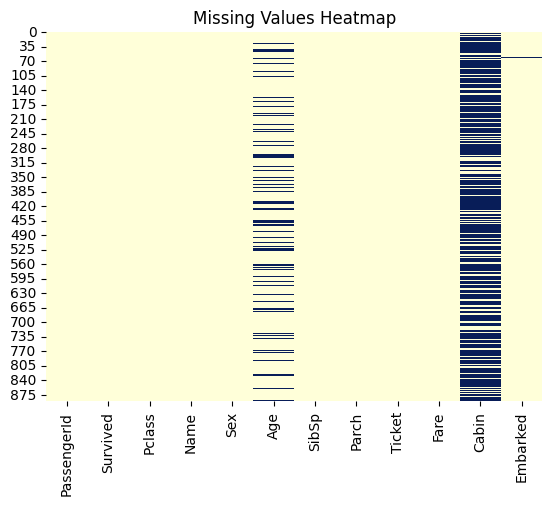

In [3]:
# Count missing values
df.isnull().sum().sort_values(ascending=False)

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()


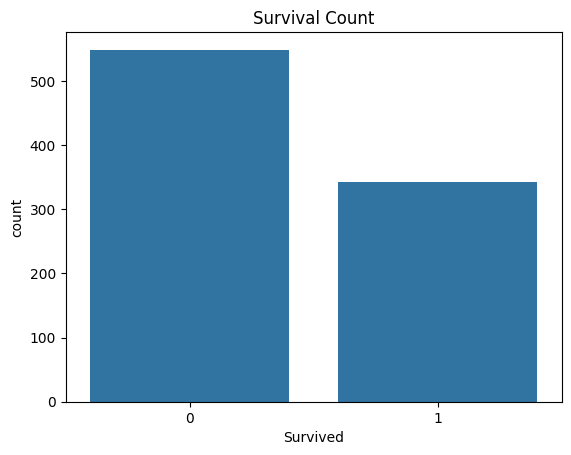

In [4]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


Text(0.5, 1.0, 'Gender Distribution')

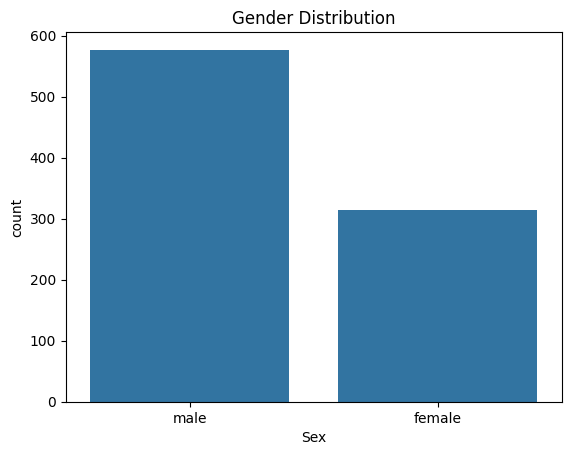

In [5]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")


Text(0.5, 1.0, 'Passenger Class Count')

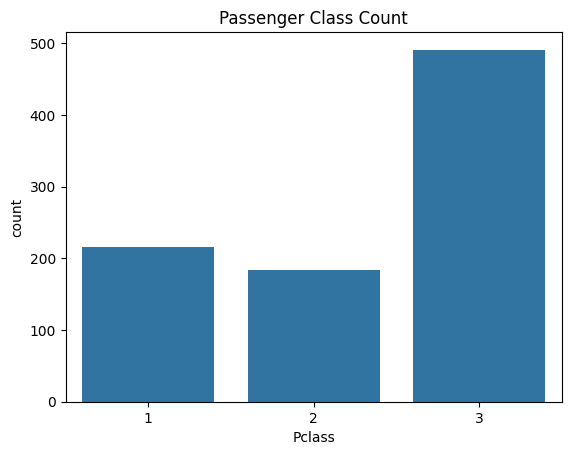

In [6]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Count")


Text(0.5, 1.0, 'Age Distribution')

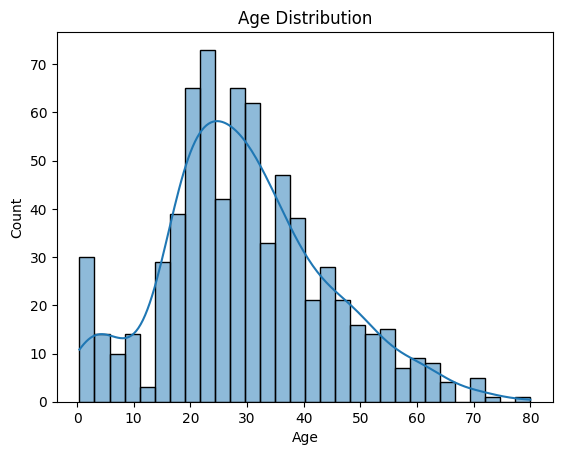

In [7]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")


Text(0.5, 1.0, 'Survival Rate by Gender')

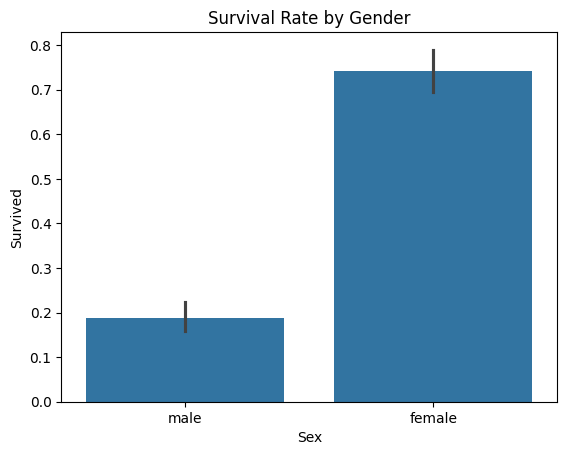

In [8]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")


Text(0.5, 1.0, 'Survival Rate by Class')

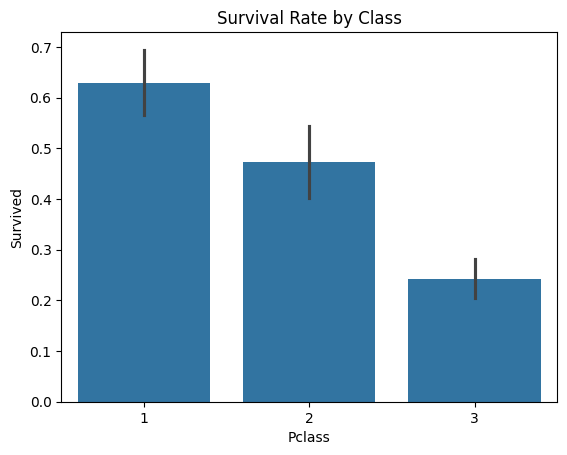

In [9]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")


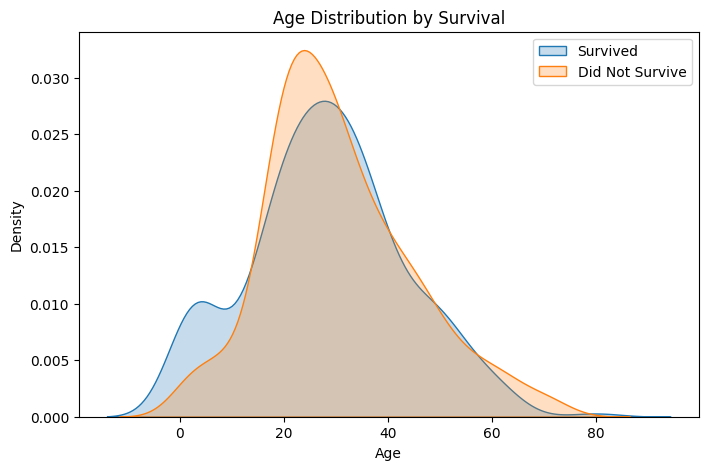

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)
plt.title("Age Distribution by Survival")
plt.legend()


Text(0.5, 1.0, 'Fare Distribution')

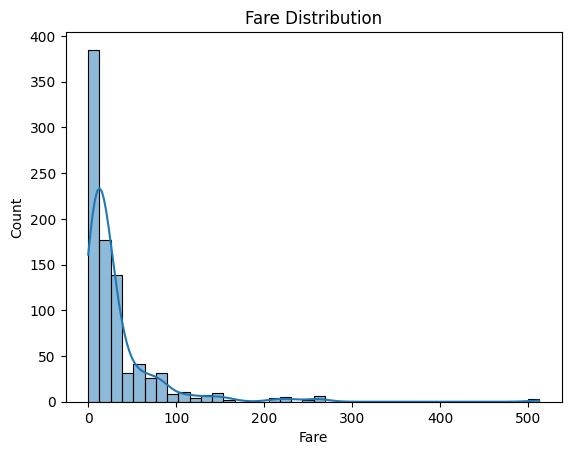

In [11]:
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")


Text(0.5, 1.0, 'Fare by Class')

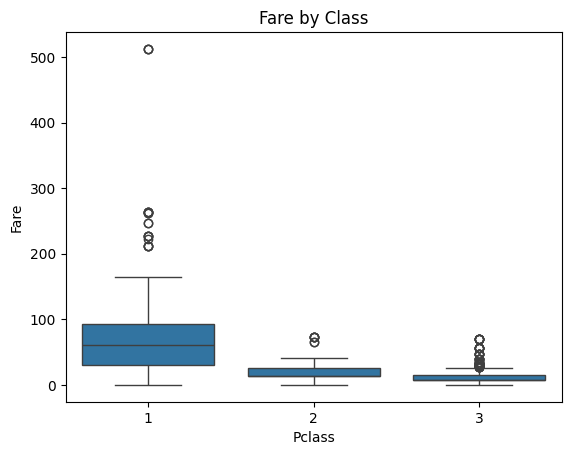

In [12]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Class")


Text(0.5, 1.0, 'Correlation Heatmap')

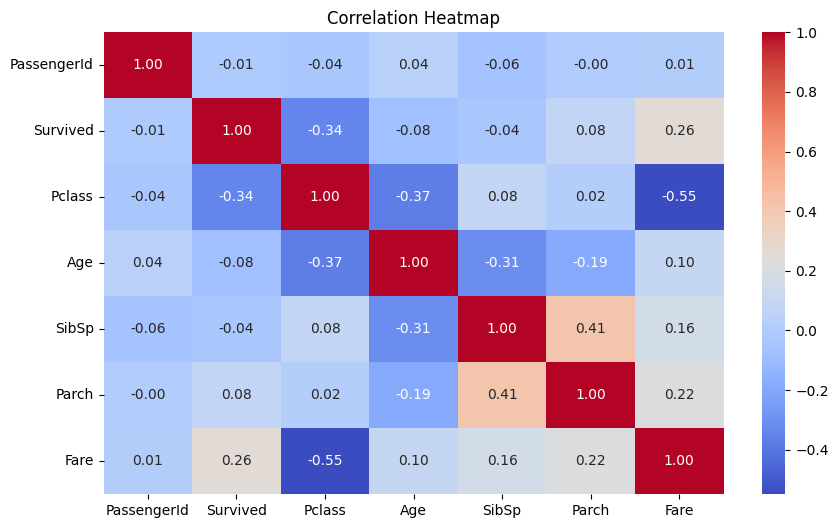

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")


Text(0.5, 1.0, 'Age Outliers')

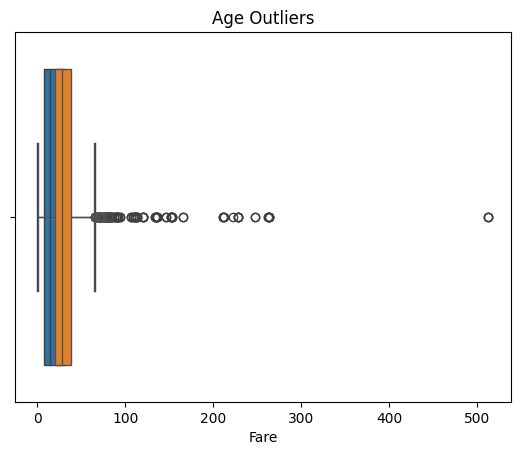

In [14]:
# Fare outliers
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")

# Age outliers
sns.boxplot(x=df['Age'])
plt.title("Age Outliers")


In [16]:
df = df.copy()
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

if 'Fare' in df.columns and 'Pclass' in df.columns:
    df['Fare'] = df['Fare'].fillna(df[df['Pclass'] == 3]['Fare'].median())

if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
    title_map = {
        "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Lady": "Rare", "Countess": "Rare",
        "Capt": "Rare", "Col": "Rare", "Don": "Rare", "Dr": "Rare", "Major": "Rare",
        "Rev": "Rare", "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
    }
    df['Title'] = df['Title'].replace(title_map)

    if 'Age' in df.columns:
        df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

cols_to_encode = ['Sex', 'Embarked', 'Title']
existing = [col for col in cols_to_encode if col in df.columns]

df = pd.get_dummies(df, columns=existing, drop_first=True)

print("Feature engineering completed. DataFrame shape:", df.shape)
print(df.head())


Feature engineering completed. DataFrame shape: (891, 22)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  ...  Embarked_Q  Embarked_S  Title_Miss  \
0         A/5 21171   7.2500   NaN  ...       False        True       False   
1          PC 17599  71.2833   C85  ...       False       False       False   
2  STON/O2. 3101282   7.9250   